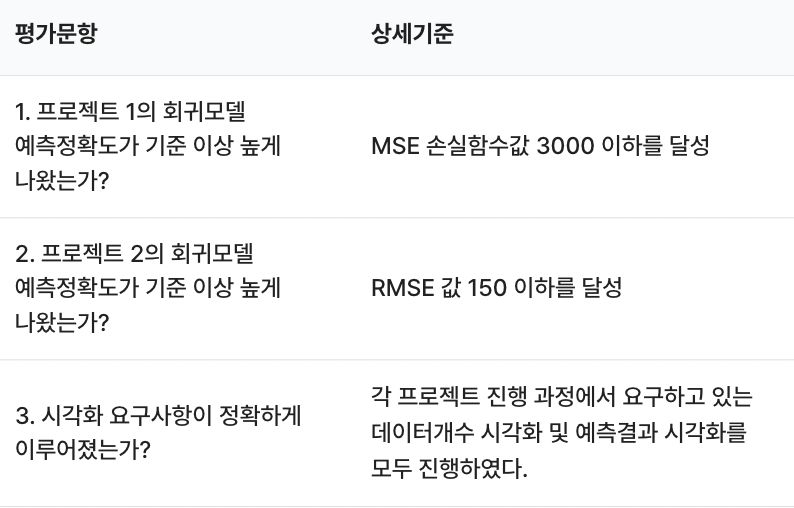

# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

### (1) 데이터 가져오기
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes  
sklearn.datasets.load_diabetes

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
type(diabetes)

sklearn.utils.Bunch

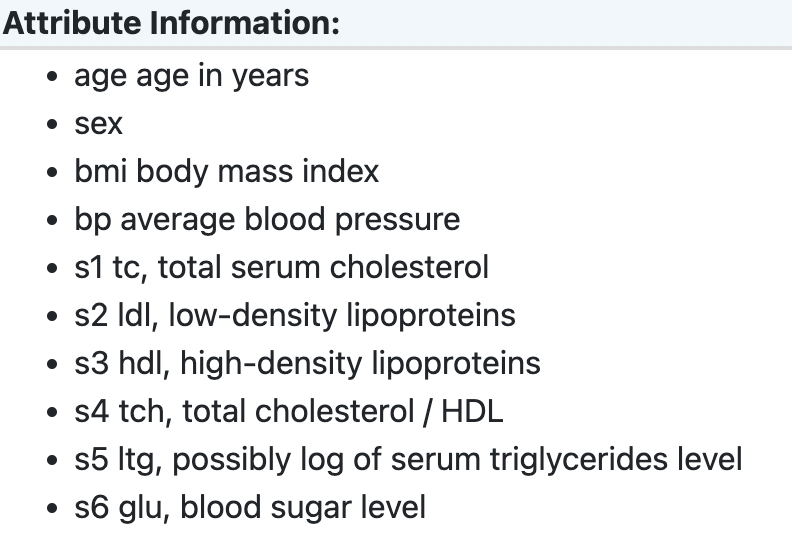  
age : 나이  
sex : 성별  
bmi : 체질량지수  
bp : 평균 혈압  
s1 : 혈중 총 콜레스테롤  
s2 : 저밀도 지질단백질  
s3 : 고밀도 지질단백질  
s4 : 총 콜레스테롤 수치  
s5 : 혈중 트리글리세라이드 수치  
s6 : 혈당 수치

In [2]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
dia_data = diabetes.data
dia_data.shape

(442, 10)

In [5]:
dia_target = diabetes.target
dia_target.shape

(442,)

In [6]:
dia_feature = diabetes.feature_names
len(dia_feature)
#리스트 형태여서 shape 안된다.

10

In [7]:
import pandas as pd
X_df = pd.DataFrame(data = dia_data, columns = dia_feature)
X_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [8]:
y_df = pd.DataFrame(data = dia_target, columns = ['target'])
y_df
# columns = [ ] 대괄호를 꼭 써야하네요

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


https://www.codeit.kr/community/threads/15968  
1. diabetes_dataset의 메소드 target으로 데이터가 존재
2. 이에 대한 컬럼명을 diabetes로 하는 데이터 프레임을 생성
3. 이를 y 변수에 할당

### (2) 모델에 입력할 데이터 X 준비하기
https://velog.io/@skkumin/Pandas-DataFrame-Numpy-array%EB%A1%9C-%EB%B3%80%ED%99%98%ED%95%98%EA%B8%B0  
- pandas 의 dataframe을 numpy array로 바꾸기  
df = df.to_numpy()  
df

In [9]:
type(X_df)

pandas.core.frame.DataFrame

In [10]:
X_arr = X_df.to_numpy()
X_arr

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [11]:
type(X_arr)

numpy.ndarray

In [12]:
X_arr.shape

(442, 10)

### (3) 모델에 예측할 데이터 y 준비하기

In [13]:
type(y_df)

pandas.core.frame.DataFrame

to_numpy 함수 쓸때 to_numpy() 소괄호를 써야하네요..  
<bound method DataFrame.to_numpy of      target

In [14]:
y_arr = y_df.to_numpy()
y_arr[:5 +1]

array([[151.],
       [ 75.],
       [141.],
       [206.],
       [135.],
       [ 97.]])

In [15]:
type(y_arr)

numpy.ndarray

In [16]:
y_arr.shape

(442, 1)

### (4) train 데이터와 test 데이터로 분리하기
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split  
sklearn.model_selection.train_test_split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, 
                                                    test_size= 0.15, 
                                                    random_state= 5)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((375, 10), (67, 10), (375, 1), (67, 1))

In [19]:
X_test[:, -1]

array([ 0.04034337,  0.04448548, -0.00936191,  0.00720652, -0.03835666,
        0.03620126, -0.05492509,  0.01963284, -0.00936191,  0.10661708,
       -0.04664087, -0.05906719,  0.02377494, -0.01350402,  0.12732762,
        0.02377494, -0.0010777 , -0.07563562, -0.06735141, -0.03835666,
        0.01549073, -0.03007245, -0.05492509,  0.07348023,  0.02791705,
       -0.03007245,  0.04862759,  0.03205916,  0.07348023, -0.01764613,
       -0.07149352, -0.07977773, -0.05078298, -0.01764613, -0.09634616,
        0.00306441,  0.00720652, -0.01350402,  0.01549073, -0.01764613,
       -0.0052198 , -0.01350402,  0.01963284,  0.13561183, -0.03007245,
       -0.04249877,  0.07348023, -0.05492509,  0.06105391, -0.0052198 ,
        0.05276969, -0.01764613,  0.04862759,  0.06933812, -0.0052198 ,
       -0.03835666,  0.01134862, -0.08391984, -0.01350402,  0.04034337,
       -0.05492509,  0.01963284,  0.01963284,  0.06105391,  0.04862759,
        0.08590655, -0.0010777 ])

In [20]:
y_test[:10 +1]

array([[281.],
       [332.],
       [178.],
       [155.],
       [137.],
       [ 65.],
       [ 31.],
       [275.],
       [138.],
       [173.],
       [ 90.]])

### (5) 모델 준비하기
입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.  
모델 함수를 구현해주세요.  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression  
sklearn.linear_model.LinearRegression  

In [123]:
def model(x, w, b):
    y = w * x + b
    return y

### (6) 손실함수 loss 정의하기
손실함수를 MSE 함수로 정의해주세요.  

In [124]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [125]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

### (7) 기울기를 구하는 gradient 함수 구현하기
기울기를 계산하는 gradient 함수를 구현해주세요.  

In [156]:
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)

In [269]:
x = X_arr
y = y_arr
W = 0.5
b = 0.05

In [270]:
prediction = model(X, W, b) 
prediction.shape

(442,)

In [271]:
dW, db = gradient(X, W, b, y)
dW.shape, db.shape

((), ())

### (8) 하이퍼 파라미터인 학습률 설정하기
학습률, learning rate 를 설정해주세요  
만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [272]:
LEARNING_RATE = 1

In [273]:
losses = []

for i in range(1, 740 +1):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 29063.5460
Iteration 20 : Loss 29032.3064
Iteration 30 : Loss 29003.7262
Iteration 40 : Loss 28977.5793
Iteration 50 : Loss 28953.6590
Iteration 60 : Loss 28931.7760
Iteration 70 : Loss 28911.7572
Iteration 80 : Loss 28893.4441
Iteration 90 : Loss 28876.6918
Iteration 100 : Loss 28861.3676
Iteration 110 : Loss 28847.3500
Iteration 120 : Loss 28834.5282
Iteration 130 : Loss 28822.8003
Iteration 140 : Loss 28812.0736
Iteration 150 : Loss 28802.2628
Iteration 160 : Loss 28793.2902
Iteration 170 : Loss 28785.0845
Iteration 180 : Loss 28777.5804
Iteration 190 : Loss 28770.7184
Iteration 200 : Loss 28764.4441
Iteration 210 : Loss 28758.7071
Iteration 220 : Loss 28753.4621
Iteration 230 : Loss 28748.6672
Iteration 240 : Loss 28744.2841
Iteration 250 : Loss 28740.2778
Iteration 260 : Loss 28736.6163
Iteration 270 : Loss 28733.2702
Iteration 280 : Loss 28730.2129
Iteration 290 : Loss 28727.4197
Iteration 300 : Loss 28724.8682
Iteration 310 : Loss 28722.5379
Iteration 320 : L

In [274]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

28203.741093355868

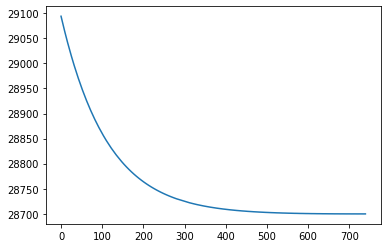

In [275]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

### (9) 모델 학습하기
정의된 손실함수와 기울기 함수로 모델을 학습해주세요.  
loss값이 충분히 떨어질 때까지 학습을 진행해주세요.  
입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [276]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [277]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred.shape

(67, 1)

### (10) test 데이터에 대한 성능 확인하기
test 데이터에 대한 성능을 확인해주세요.  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error  
sklearn.metrics.mean_squared_error  
(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)

In [278]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

2763.1309530436865

### (11) 정답 데이터와 예측한 데이터 시각화하기
x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요

In [279]:
import matplotlib.pyplot as plt

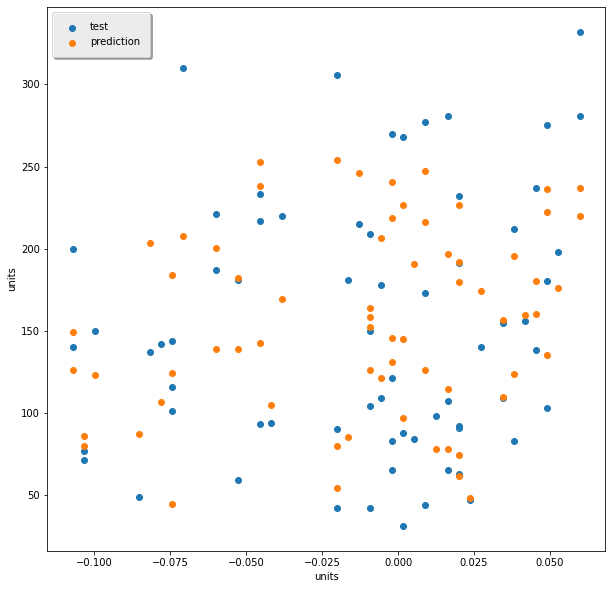

In [280]:
plt.figure(figsize= (10, 10))

plt.scatter(X_test[:, 0], y_test, label = "test")
plt.scatter(X_test[:, 0], y_pred, label = "prediction")

plt.xlabel("units")
plt.ylabel("units")
plt.legend(fancybox= True, framealpha= 0.8, shadow= True, borderpad= 1)
plt.show()

# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

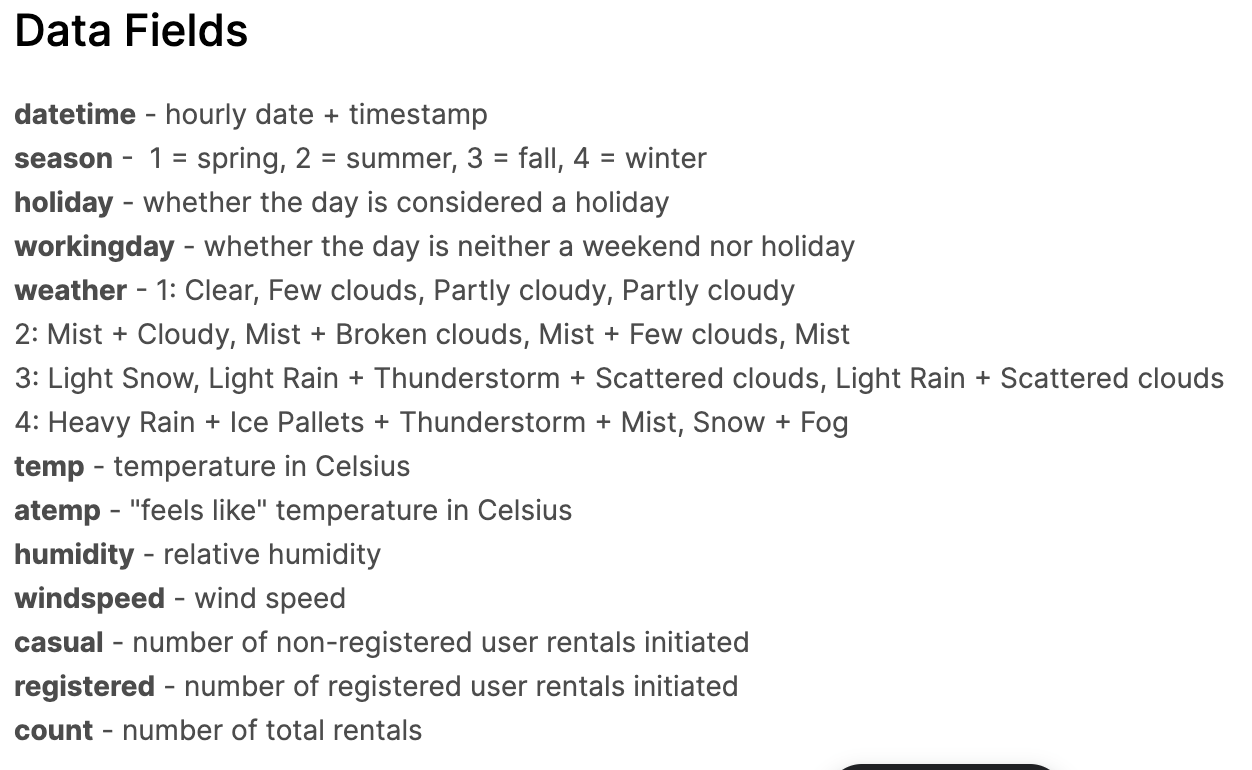

### (1) 데이터 가져오기

In [428]:
import os
path = os.getenv('HOME')
train = pd.read_csv(path + "/data/data/bike-sharing-demand/train.csv")
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [429]:
train.shape

(10886, 12)

In [430]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [431]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime  
https://stackoverflow.com/questions/54318395/series-object-has-no-attribute-to-datetime  
to_datetime 사용법은  
df.to_datetime()로 변경하는게 아니라 pd.to_datetime(df)로 사용한다.  

In [432]:
train["datetimes"] = pd.to_datetime(train['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetimes
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00


In [433]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  object        
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  datetimes   10886 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(8), object(1)
memory usage: 1.1+ MB


https://heytech.tistory.com/444

In [434]:
train['year'] = train['datetimes'].dt.strftime('%Y')
train['month'] = train['datetimes'].dt.strftime('%m')
train['day'] = train['datetimes'].dt.strftime('%d')
train['hour'] = train['datetimes'].dt.strftime('%h')
train['minute'] = train['datetimes'].dt.strftime('%m')
train['second'] = train['datetimes'].dt.strftime('%s')

In [435]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetimes,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011,01,01,Jan,01,1293840000
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011,01,01,Jan,01,1293843600
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011,01,01,Jan,01,1293847200
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011,01,01,Jan,01,1293850800
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011,01,01,Jan,01,1293854400


### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
https://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot  
seaborn.countplot  
(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, ax=None, **kwargs)

sns.countplot 활용해서 시각화하기  
subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기  

In [436]:
import seaborn as sns
import matplotlib.pyplot as plt

https://elly-kim.tistory.com/entry/SeabornSNS-%EC%82%AC%EC%9A%A9%EB%B2%95-1-Countplot

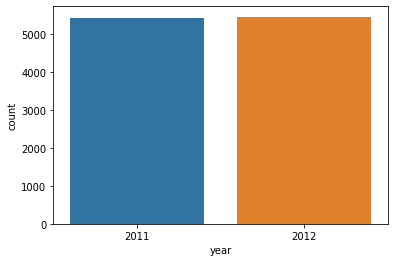

<Figure size 720x1440 with 0 Axes>

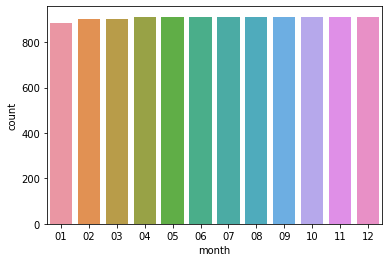

<Figure size 720x1440 with 0 Axes>

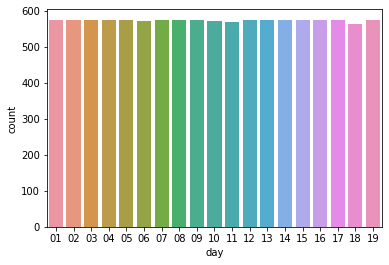

<Figure size 720x1440 with 0 Axes>

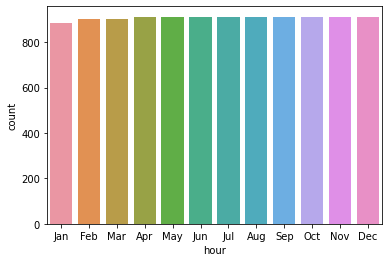

<Figure size 720x1440 with 0 Axes>

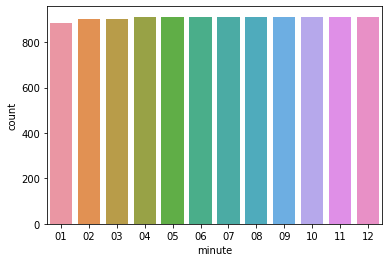

<Figure size 720x1440 with 0 Axes>

In [290]:
cols = ["year", 'month', 'day', 'hour', 'minute']
for col in cols:
    sns.countplot(data = train, x = train[col])
    plt.figure(figsize= (10, 20))
    plt.show()

second만 시각화로 표현되는 시간이 너무 오래 걸려서 따로 돌려보았습니다.

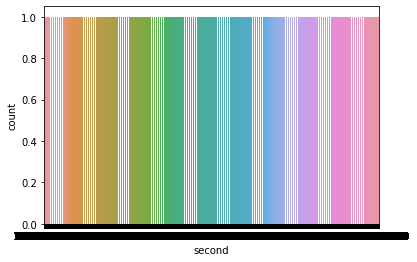

In [291]:
sns.countplot(data = train, x = 'second')
plt.show()

axes = [ax1, ax2, ax3, ax4, ax5, ax6]  
cols = ["year", 'month', 'day', 'hour', 'minute', 'second']  

for col, axs in zip(cols, axes):  
    sns.countplot(data = train, x = train[col], ax= axs)  
    plt.figure(figsize= (10, 20))  
    plt.show()   

그는 밑에 코드를 보다 더 간결하게 써보고 싶은데 시간이 부족했다.

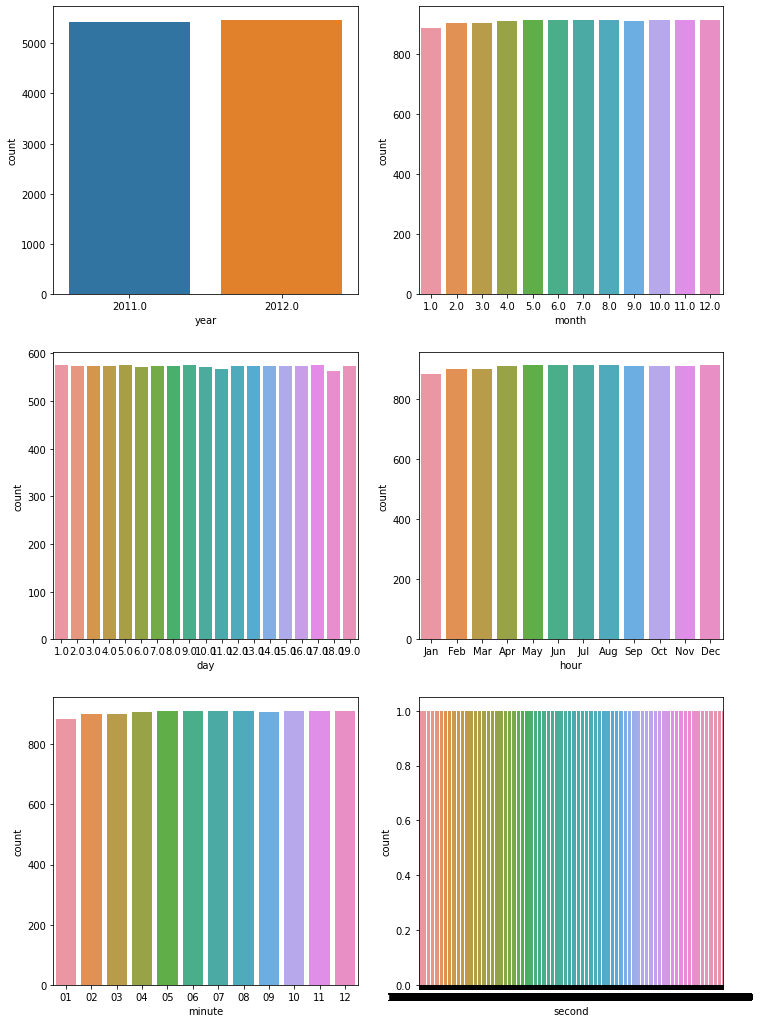

In [382]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)
#Set the figure size in inches.(w, h=None, forward=True)
#Width and height

sns.countplot(data= train, x= "year", ax= ax1)
sns.countplot(data= train, x= "month", ax= ax2)
sns.countplot(data= train, x= "day", ax= ax3)
sns.countplot(data= train, x= "hour", ax= ax4)
sns.countplot(data= train, x= "minute", ax= ax5)
sns.countplot(data= train, x= "second", ax= ax6)
plt.show()

### (4) X, y 컬럼 선택 및 train/test 데이터 분리
X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다  
데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다.  
만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다.  
ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [437]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  object        
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  datetimes   10886 non-null  datetime64[ns]
 13  year        10886 non-null  object        
 14  month       10886 non-null  object        
 15  day         10886 non-null  object        
 16  hour        10886 non-

In [443]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetimes,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011,01,01,Jan,01,1293840000
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011,01,01,Jan,01,1293843600
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011,01,01,Jan,01,1293847200
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011,01,01,Jan,01,1293850800
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011,01,01,Jan,01,1293854400


year, month, day 사용하려고 하는 열들이 object이기에 바꿔야한다는 강박관념이 있네요?!

In [442]:
train_f = train.astype({'year': 'float64', 'month': "float64", 'day': "float64"})
train_f

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetimes,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01 00:00:00,2011.0,1.0,1.0,Jan,01,1293840000
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01 01:00:00,2011.0,1.0,1.0,Jan,01,1293843600
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01 02:00:00,2011.0,1.0,1.0,Jan,01,1293847200
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01 03:00:00,2011.0,1.0,1.0,Jan,01,1293850800
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01 04:00:00,2011.0,1.0,1.0,Jan,01,1293854400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19 19:00:00,2012.0,12.0,19.0,Dec,12,1355943600
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19 20:00:00,2012.0,12.0,19.0,Dec,12,1355947200
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19 21:00:00,2012.0,12.0,19.0,Dec,12,1355950800
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19 22:00:00,2012.0,12.0,19.0,Dec,12,1355954400


In [444]:
train_f.drop(["datetime", "datetimes", "casual", "registered", "hour", "minute", "second"], axis = 1, inplace = True)

In [445]:
train_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  float64
 10  month       10886 non-null  float64
 11  day         10886 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 1020.7 KB


In [446]:
train_f.iloc[:, 2:4 +1].value_counts()

workingday  weather  temp 
1           1        28.70    208
                     26.24    207
                     13.94    197
                     18.86    191
                     24.60    181
                             ... 
0           3        4.10       1
                     4.92       1
                     5.74       1
                     19.68      1
1           4        8.20       1
Length: 247, dtype: int64

In [447]:
train["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [515]:
X = train_f[['season', 'holiday', 'weather', 'temp', 'atemp', 'humidity', 'year', 'day']].values
y = train_f['count'].values

In [516]:
X.shape, y.shape

((10886, 8), (10886,))

In [517]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size= 0.20, 
                                                    random_state= 100)

In [518]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8708, 8), (2178, 8), (8708,), (2178,))

### (5) LinearRegression 모델 학습

In [519]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [520]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred.shape

(2178,)

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
학습된 모델에 X_test를 입력해서 예측값 출력하기  
모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기  
mse 값과 함께 rmse 값도 계산하기

In [521]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_test, y_pred)
mse2

21620.856311997606

In [522]:
rmse = np.sqrt(mse2)
rmse

147.0403220616631

rmse 값이 계속 151이여서... 하.... 하고 있었는데요  
year, month, day 열이 object여서 float으로 변환해도  
151....  
그러다가  
random_state 값을 소폭 상승 시키니까 값이 떨어지네요  
포기하려가다 마지막에 성공 ㅎ

### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기  
x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

In [498]:
train_f["temp"].shape, train_f['count'].shape

((10886,), (10886,))

In [497]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8708, 7), (2178, 7), (8708,), (2178,))

In [501]:
y_pred.shape

(2178,)

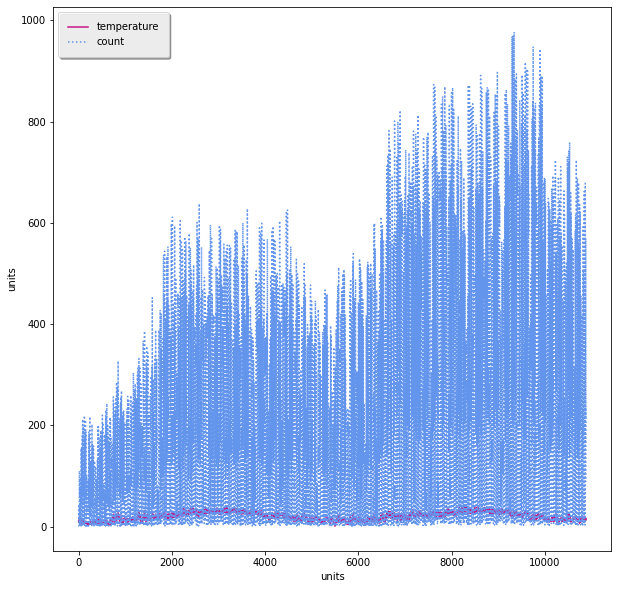

In [496]:
plt.figure(figsize= (10, 10))

plt.plot(train_f["temp"], label= "temperature", color = "mediumvioletred")
plt.plot(train_f["count"], label= "count", color = "cornflowerblue", linestyle=':')

plt.xlabel("units")
plt.ylabel("units")
plt.legend(fancybox= True, framealpha= 0.8, shadow= True, borderpad= 1)
plt.show()

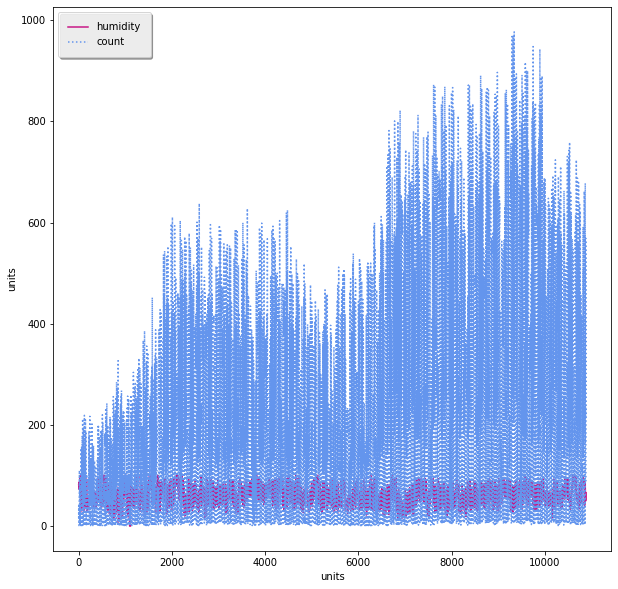

In [499]:
plt.figure(figsize= (10, 10))

plt.plot(train_f["humidity"], label= "humidity", color = "mediumvioletred")
plt.plot(train_f["count"], label= "count", color = "cornflowerblue", linestyle=':')

plt.xlabel("units")
plt.ylabel("units")
plt.legend(fancybox= True, framealpha= 0.8, shadow= True, borderpad= 1)
plt.show()

train_test_split을 통해서 나온 예측 결과들 기준으로 데이터 프레임화 시키고 시각화 하는 것.을  
뒤늦게 깨달은 1인.  
아닐 수도... ㅎ

In [506]:
pred_count = pd.DataFrame(data= y_pred, columns= ["count"])
pred_count

,count
0,289.850501
1,112.319035
2,160.183586
3,214.394554
4,180.870411
...,...
2173,335.582761
2174,-2.499226
2175,105.062823
2176,165.221332


In [524]:
abc = ['season', 'holiday', 'weather', 'temp', 'atemp', 'humidity', 'year', 'day']

temp_humidity = pd.DataFrame(data= X_test, columns = abc)
temp_humidity

,season,holiday,weather,temp,atemp,humidity,year,day
0,2.0,0.0,1.0,23.78,27.275,46.0,2012.0,5.0
1,2.0,0.0,1.0,14.76,16.665,53.0,2011.0,2.0
2,2.0,0.0,1.0,27.88,31.820,74.0,2011.0,11.0
3,3.0,0.0,2.0,27.06,31.060,65.0,2011.0,18.0
4,1.0,0.0,1.0,13.12,15.150,21.0,2011.0,15.0
...,...,...,...,...,...,...,...,...
2173,3.0,0.0,1.0,35.26,38.635,39.0,2011.0,9.0
2174,1.0,0.0,2.0,9.84,12.120,75.0,2011.0,1.0
2175,1.0,0.0,3.0,4.92,3.790,50.0,2012.0,11.0
2176,1.0,0.0,3.0,19.68,23.485,77.0,2012.0,16.0


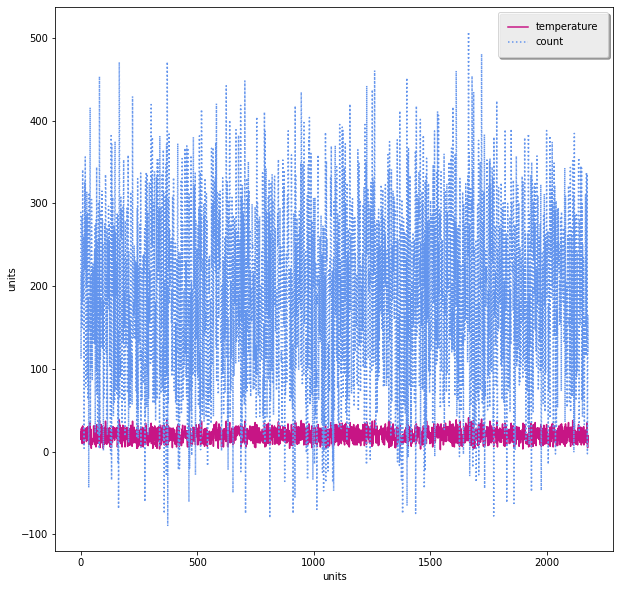

In [525]:
plt.figure(figsize= (10, 10))

plt.plot(temp_humidity["temp"], label= "temperature", color = "mediumvioletred")
plt.plot(pred_count["count"], label= "count", color = "cornflowerblue", linestyle=':')

plt.xlabel("units")
plt.ylabel("units")
plt.legend(fancybox= True, framealpha= 0.8, shadow= True, borderpad= 1)
plt.show()

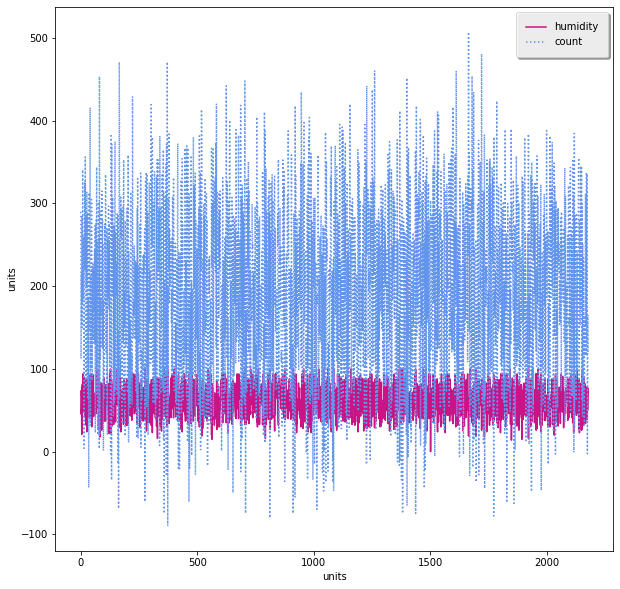

In [526]:
plt.figure(figsize= (10, 10))

plt.plot(temp_humidity["humidity"], label= "humidity", color = "mediumvioletred")
plt.plot(pred_count["count"], label= "count", color = "cornflowerblue", linestyle=':')

plt.xlabel("units")
plt.ylabel("units")
plt.legend(fancybox= True, framealpha= 0.8, shadow= True, borderpad= 1)
plt.show()

# 회고

이번 프로젝트를 통해서 구글링 및 해석  
그리고 더 나아가 그 코드들을 나 자신으로 흡수하는 과정등의 경험치가 다소 쌓였음을 느꼈습니다.  
앞으로 나아갈 길이 막힌 절벽에 서있는 느낌을 다시 한 번 더 느끼게해준 시간이였습니다.  

지금까지의 프로젝트는 질문 내용을 이해 및 해독을 잘못해도 가이드라인이 있으니까  
질문의 의도를 결국 파악을 할 수 있는데  
이번 프로젝트는 코드 가이드라인이 없으니 다소 어려움 및 갈등 상황을 겪었습니다.  
그 상황에서 이겨내려고 구글링 및 질문 등등을 통한 저 자신의 노력했던 과정들이  
분명 헛되지않으면서 저 자신에게 경험치로 쌓이고 쌓인 소중한 시간을 주셔서 감사드립니다.  

다음 번에는 지금보다 더 나은 시각화 표현법 그리고 구글링 법 더 나아가 나의 것으로 흡수할 것이라 생각합니다.

P.S 밥 드시고 하시나요?